In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import seaborn as sns

In [13]:
wine_df = pd.read_csv('221027_wine_data.csv')
wine_df.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


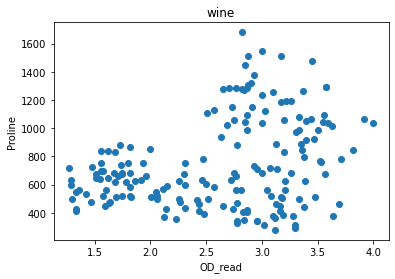

In [14]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title('wine')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

KMeans

In [15]:
ks = KMeans(3)
ks_cluster = ks.fit_predict(wine_df)

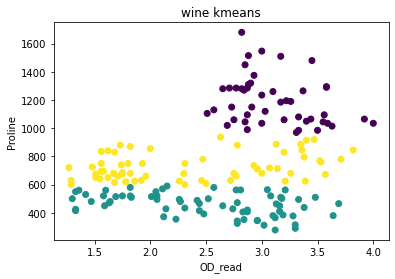

In [16]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ks_cluster)
plt.title('wine kmeans')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

계층적 군집분석

In [17]:
a = AgglomerativeClustering(3, linkage='ward')  # linkage : 거리계산 방법
a_cluster = a.fit_predict(wine_df)

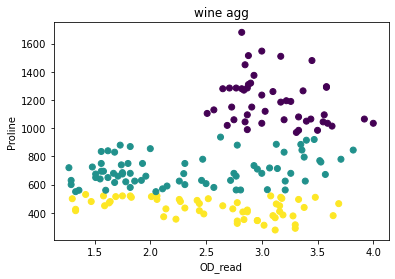

In [18]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=a_cluster)
plt.title('wine agg')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

실루엣 지수
- 얼마나 클러스터에 data가 잘 맞는지를 분석해주는 지표
- -1 ~ 1까지 숫자로 나타남
- 1에 가까울수록 완벽하게 cluster가 구분이 되었다는 뜻
- 신뢰할 수 없음

In [19]:
silhouette_score(wine_df, ks_cluster), silhouette_score(wine_df, a_cluster)

(0.5809421087616886, 0.5651908644787632)

DBSCAN VS KMeans

In [20]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
label = pd.DataFrame(iris.target, columns=['label'])

data.shape, label.shape

((150, 4), (150, 1))

In [21]:
iris_data = pd.concat([data, label], axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
pred = pd.DataFrame(dbscan.fit_predict(data), columns=['predict'])
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [26]:
r = pd.concat([iris_data, pred], axis=1)
r

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


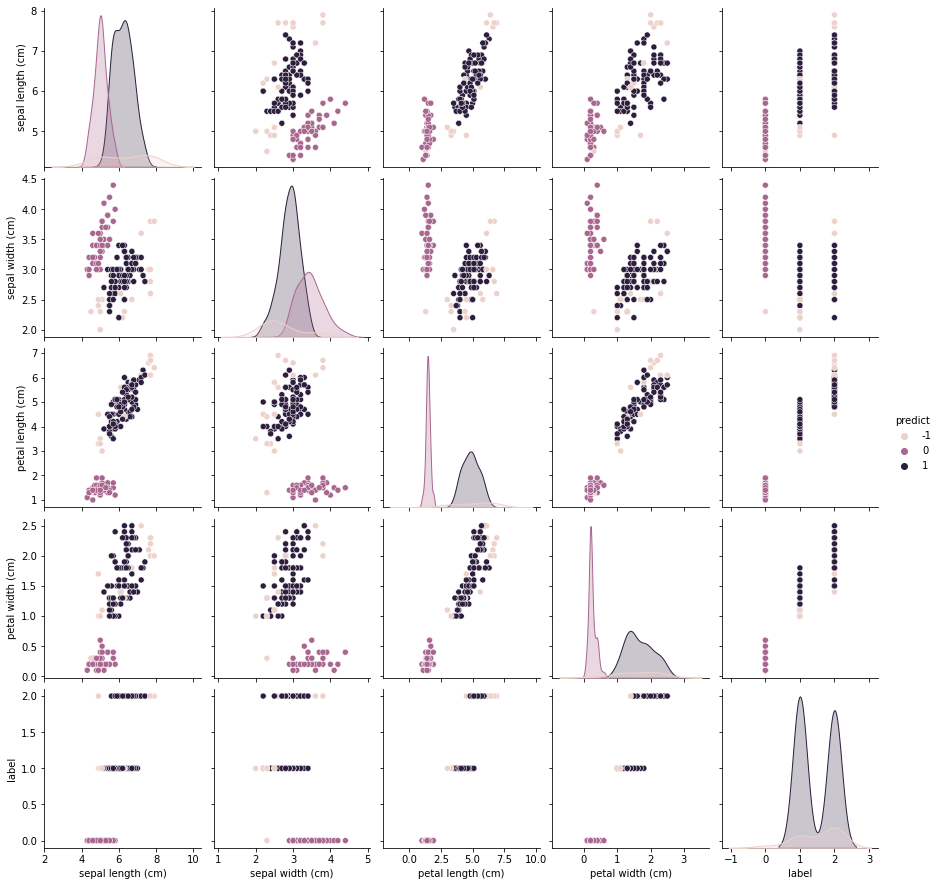

In [27]:
sns.pairplot(r, hue='predict')

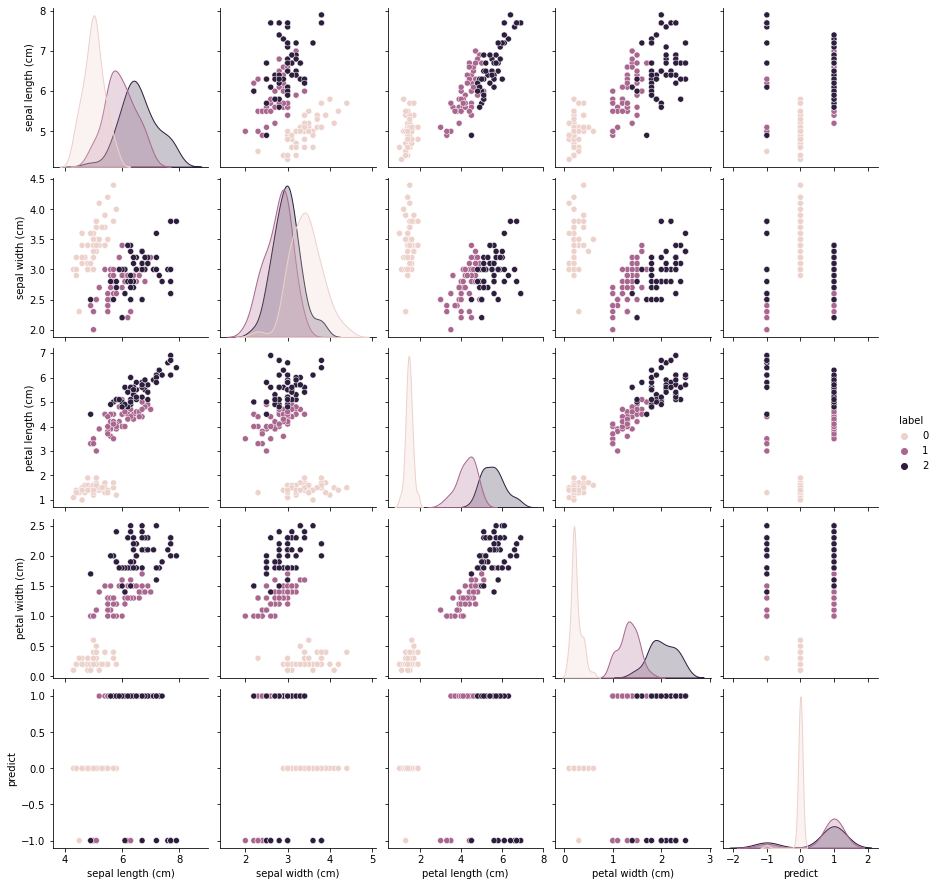

In [28]:
sns.pairplot(r, hue='label')

In [29]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=21)

In [30]:
new_label = pd.DataFrame(kmeans.labels_)
new_label.columns = ['predict']
new_label.head()

,predict
0,1
1,1
2,1
3,1
4,1


In [31]:
r2 = pd.concat([data, new_label], axis=1)
r2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


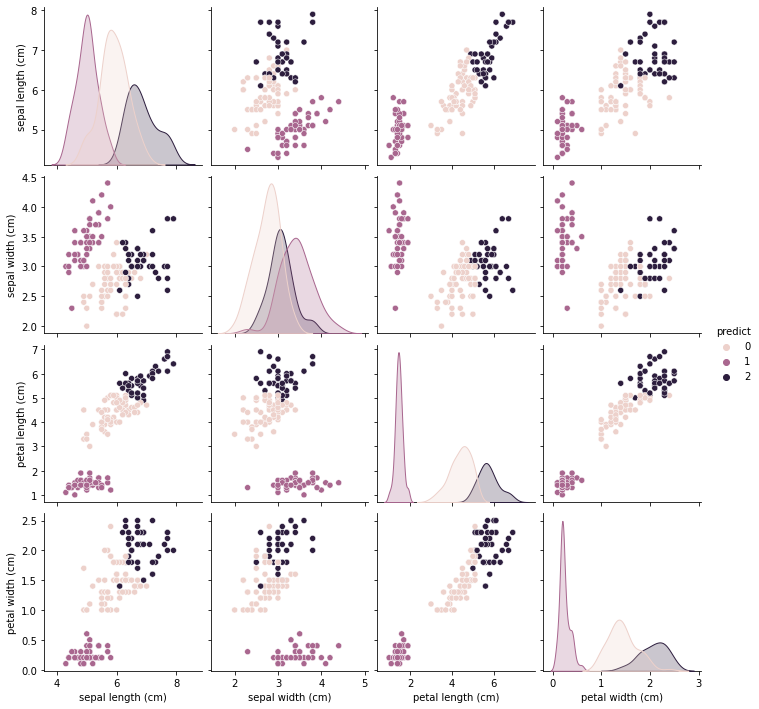

In [33]:
sns.pairplot(r2, hue='predict')

- pair plot을 봤을 때, 아이리스 data에서는 k-means가 DBSCAN보다 군집 분석을 실제 값과 비슷하게 뽑음
- 모든 data에 대해서 k-means가 좋은 것은 아님
- 머신러닝 모델들처럼 군집분석 모델도 항상 가장좋은 모델은 없음
- 각각의 data들의 특성에 맞춰 모델을 사용해야 함